In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

import seaborn as sns # library for data visualization and representation

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import math # library for mathematical operations
%matplotlib inline


print('Libraries imported.')

Libraries imported.


In [2]:
df = pd.read_csv(r'C:\Users\cruise\downloads\Data_for_UCI_named.csv',error_bad_lines=False)

In [3]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [4]:
df.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [5]:
df.drop('stab',inplace=True,axis=1)

In [6]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [7]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix

In [8]:
X=df.drop('stabf',axis=1)
y=df.stabf

In [9]:

#split the data into training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [10]:
## standardize the dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_trainscale = scaler.transform(x_train)

In [11]:
x_testscale = scaler.transform(x_test)

In [12]:
x_trainscale1 = pd.DataFrame(x_trainscale, columns = x_train.columns)
x_testscale1 = pd.DataFrame(x_testscale, columns = x_test.columns)

In [13]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=1)

In [14]:
rfc.fit(x_trainscale1,y_train)

RandomForestClassifier(random_state=1)

In [15]:
rfc_pred=rfc.predict(x_testscale1)

In [16]:
y_test.unique()

array(['unstable', 'stable'], dtype=object)

In [17]:
from sklearn.metrics import accuracy_score, classification_report

In [18]:
print(classification_report(y_test,rfc_pred, digits=4))

              precision    recall  f1-score   support

      stable     0.9191    0.8778    0.8980       712
    unstable     0.9341    0.9573    0.9456      1288

    accuracy                         0.9290      2000
   macro avg     0.9266    0.9176    0.9218      2000
weighted avg     0.9288    0.9290    0.9286      2000



In [19]:

from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix

cnf_mat = confusion_matrix(y_test, rfc_pred, labels=['unstable', 'stable'])

cnf_mat 

array([[1233,   55],
       [  87,  625]], dtype=int64)

In [20]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix

In [21]:
accuracy = accuracy_score(y_test, rfc_pred)

accuracy

0.929

In [22]:
recall = recall_score(y_test, rfc_pred, pos_label='stable')
print('Recall: {}'.format(round(recall*100, 2)))

Recall: 87.78


In [23]:
precision = precision_score(y_test, rfc_pred, pos_label='stable')
print('Precision: {}'.format(round(precision*100, 2)))

Precision: 91.91


In [24]:
f1 = f1_score(y_test, rfc_pred, pos_label='stable')

print('F1: {}'.format(round(f1*100, 2)))

F1: 89.8


In [25]:
from sklearn.ensemble import ExtraTreesClassifier

ETC=ExtraTreesClassifier(random_state=1)

In [26]:
ETC.fit(x_trainscale1,y_train)

ExtraTreesClassifier(random_state=1)

In [27]:
ETC_pred=ETC.predict(x_testscale1)

In [28]:
print(classification_report(y_test,ETC_pred, digits=4))

              precision    recall  f1-score   support

      stable     0.9410    0.8511    0.8938       712
    unstable     0.9218    0.9705    0.9455      1288

    accuracy                         0.9280      2000
   macro avg     0.9314    0.9108    0.9197      2000
weighted avg     0.9287    0.9280    0.9271      2000



In [29]:
cnf_mat1 = confusion_matrix(y_test, ETC_pred)

cnf_mat1 

array([[ 606,  106],
       [  38, 1250]], dtype=int64)

In [30]:
accuracy1 = accuracy_score(y_test, ETC_pred)

print('Accuracy1: {}'.format(round(accuracy1*100, 2)))

Accuracy1: 92.8


In [31]:
recall1 = recall_score(y_test, ETC_pred, pos_label='stable')
print('Recall1: {}'.format(round(recall1*100, 2)))

Recall1: 85.11


In [32]:
precision1 = precision_score(y_test, ETC_pred, pos_label='stable')
print('Precision1: {}'.format(round(precision1*100, 2)))

Precision1: 94.1


In [33]:
f11 = f1_score(y_test, ETC_pred, pos_label='stable')

print('F11: {}'.format(round(f11*100, 2)))

F11: 89.38


In [34]:
from xgboost import XGBClassifier

XGB=XGBClassifier(random_state=1)
XGB.fit(x_trainscale1,y_train)

XGBClassifier(random_state=1)

In [35]:
XGB_pred=XGB.predict(x_testscale1)

In [36]:
print(classification_report(y_test,XGB_pred, digits=4))

              precision    recall  f1-score   support

      stable     0.9206    0.8469    0.8822       712
    unstable     0.9190    0.9596    0.9389      1288

    accuracy                         0.9195      2000
   macro avg     0.9198    0.9033    0.9105      2000
weighted avg     0.9195    0.9195    0.9187      2000



In [37]:
cnf_mat2 = confusion_matrix(y_test, XGB_pred)

cnf_mat2 

array([[ 603,  109],
       [  52, 1236]], dtype=int64)

In [38]:
accuracy2 = accuracy_score(y_test, XGB_pred)

print('Accuracy2: {}'.format(round(accuracy2*100, 2)))

Accuracy2: 91.95


In [39]:
recall2 = recall_score(y_test, XGB_pred, pos_label='stable')
print('Recall2: {}'.format(round(recall2*100,  2)))

Recall2: 84.69


In [40]:
precision2 = precision_score(y_test, XGB_pred, pos_label='stable')
print('Precision2: {}'.format(round(precision2*100, 2)))

Precision2: 92.06


In [41]:
f12 = f1_score(y_test, XGB_pred, pos_label='stable')

print('F12: {}'.format(round(f12*100, 2)))

F12: 88.22


In [42]:
from lightgbm import LGBMClassifier

LGBM=LGBMClassifier(random_state=1)
LGBM.fit(x_trainscale1,y_train)

LGBMClassifier(random_state=1)

In [43]:
LGBM_pred=LGBM.predict(x_testscale1)

In [44]:
print(classification_report(y_test,LGBM_pred, digits=4))

              precision    recall  f1-score   support

      stable     0.9297    0.8919    0.9104       712
    unstable     0.9415    0.9627    0.9520      1288

    accuracy                         0.9375      2000
   macro avg     0.9356    0.9273    0.9312      2000
weighted avg     0.9373    0.9375    0.9372      2000



In [45]:
cnf_mat3 = confusion_matrix(y_test, LGBM_pred)

cnf_mat3 

array([[ 635,   77],
       [  48, 1240]], dtype=int64)

In [46]:
accuracy3 = accuracy_score(y_test, LGBM_pred)

print('Accuracy3: {}'.format(round(accuracy3*100, 2)))

Accuracy3: 93.75


In [47]:
recall3 = recall_score(y_test, LGBM_pred, pos_label='stable')
print('Recall3: {}'.format(round(recall3*100, 2)))

Recall3: 89.19


In [48]:
precision3 = precision_score(y_test, LGBM_pred, pos_label='stable')
print('Precision3: {}'.format(round(precision3*100, 2)))

Precision3: 92.97


In [49]:
f13 = f1_score(y_test, LGBM_pred, pos_label='stable')

print('F13: {}'.format(round(f13*100, 2)))

F13: 91.04


In [50]:
n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None]

In [51]:
hyperparameter_grid = {'n_estimators': n_estimators,

                       'min_samples_leaf': min_samples_leaf,

                       'min_samples_split': min_samples_split,

                       'max_features': max_features}

In [52]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [62]:
Randommodel2=RandomizedSearchCV(ExtraTreesClassifier(random_state=1),
                                hyperparameter_grid, random_state = 1,cv=5,verbose=1,
                               scoring = 'accuracy', n_jobs=-1, n_iter = 10).fit(x_trainscale1,y_train).best_estimator_


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   50.2s finished


In [63]:
ETC_predsch=Randommodel2.predict(x_testscale1)

In [64]:
print(classification_report(y_test,ETC_predsch, digits = 4))

              precision    recall  f1-score   support

      stable     0.9693    0.8413    0.9008       712
    unstable     0.9182    0.9852    0.9506      1288

    accuracy                         0.9340      2000
   macro avg     0.9437    0.9133    0.9257      2000
weighted avg     0.9364    0.9340    0.9328      2000



In [85]:
Randommodel2_best_params=RandomizedSearchCV(ExtraTreesClassifier(),
                                hyperparameter_grid, random_state = 1,cv=5,verbose=1,
                               scoring = 'accuracy', n_jobs=-1, n_iter = 10).fit(x_trainscale1,y_train).best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   51.8s finished


In [86]:
Randommodel2_best_params

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': None}

In [108]:
ETC.feature_importances_

array([0.11621534, 0.11946335, 0.11489986, 0.11483932, 0.0398512 ,
       0.04053986, 0.040546  , 0.04002891, 0.08927531, 0.09321228,
       0.09642527, 0.0947033 ])

Feature ranking:
tau2 0.11844468079199041
tau1 0.11739736493320078
tau4 0.11546569217199552
tau3 0.11316851246674982
g3 0.09688268324346265
g4 0.09401881529815702
g2 0.09367635844551439
g1 0.08978290601483987
p3 0.040706278296424536
p4 0.040578638540044426
p2 0.04037131556379323
p1 0.039506754233827476


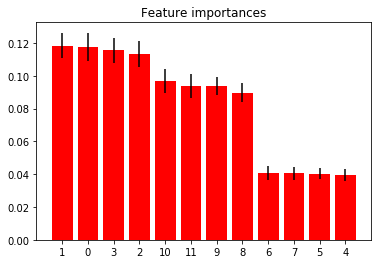

In [81]:
importances = ETC.feature_importances_
std = np.std([tree.feature_importances_ for tree in ETC.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_trainscale1.shape[1]):
    print(x_trainscale1.columns[indices[f]], importances[indices[f]])

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_trainscale1.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(x_trainscale1.shape[1]), indices)
plt.xlim([-1, x_trainscale1.shape[1]])
plt.show()

In [111]:
x_trainscale1.columns

Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4'],
      dtype='object')

In [33]:
importances = ETC.feature_importances_
std = np.std([tree.feature_importances_ for tree in ETC.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_trainscale1.shape[1]):
    print((x_trainscale1.columns[indices[f]], importances[indices[f]]))

Feature ranking:
('tau2', 0.11844468079199041)
('tau1', 0.11739736493320078)
('tau4', 0.11546569217199552)
('tau3', 0.11316851246674982)
('g3', 0.09688268324346265)
('g4', 0.09401881529815702)
('g2', 0.09367635844551439)
('g1', 0.08978290601483987)
('p3', 0.040706278296424536)
('p4', 0.040578638540044426)
('p2', 0.04037131556379323)
('p1', 0.039506754233827476)
